In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["TF_CPP_MIN_LOG_LEVEI"]='3'

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

(train_input, train_target), (test_input, test_target)= keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [6]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [7]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-07-20 15:41:03.932321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5296 - accuracy: 0.8135
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8568
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3578 - accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8789
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3203 - accuracy: 0.8854


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

---
## 손실곡선

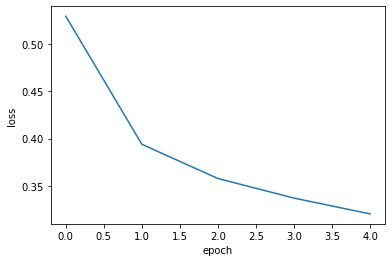

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

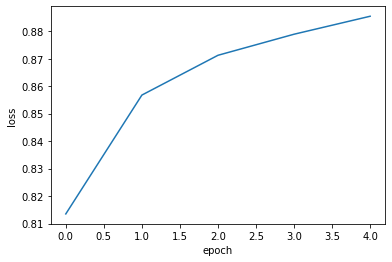

In [11]:
# 정확도 보기
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
## 반복훈련 증가

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5360 - accuracy: 0.8125
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3600 - accuracy: 0.8724
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8791
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8853
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8903
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3009 - accuracy: 0.8938
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.8977
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9005
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

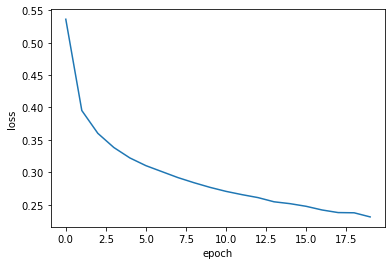

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

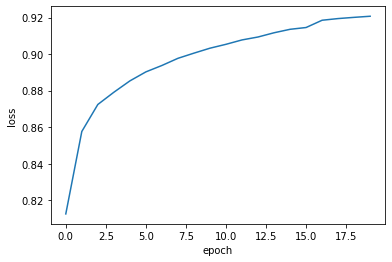

In [15]:
# 정확도 보기
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
## 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [16]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5316 - accuracy: 0.8135 - val_loss: 0.4065 - val_accuracy: 0.8527
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3897 - accuracy: 0.8597 - val_loss: 0.4267 - val_accuracy: 0.8487
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3526 - accuracy: 0.8724 - val_loss: 0.3725 - val_accuracy: 0.8660
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8805 - val_loss: 0.3704 - val_accuracy: 0.8726
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3189 - accuracy: 0.8871 - val_loss: 0.3640 - val_accuracy: 0.8775
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.8911 - val_loss: 0.3667 - val_accuracy: 0.8773
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8944 - val_loss: 0.3561 - val_accuracy:

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

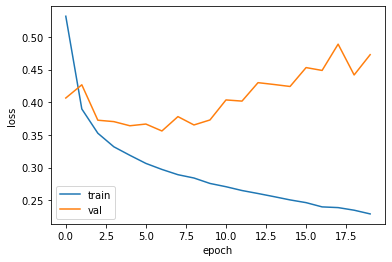

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고있으나     
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.   
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.   

---
## Optimizer(adam)

In [20]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5215 - accuracy: 0.8169 - val_loss: 0.4129 - val_accuracy: 0.8527
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3893 - accuracy: 0.8604 - val_loss: 0.3684 - val_accuracy: 0.8677
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8733 - val_loss: 0.3505 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8829 - val_loss: 0.3613 - val_accuracy: 0.8714
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8892 - val_loss: 0.3353 - val_accuracy: 0.8788
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.8944 - val_loss: 0.3336 - val_accuracy: 0.8821
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.8985 - val_loss: 0.3348 - val_accuracy:

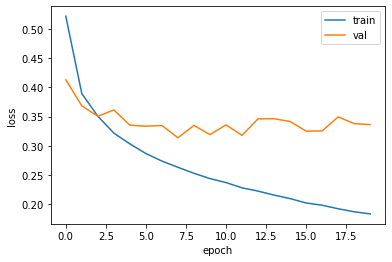

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고있으나     
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.   
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.   
> Optimizer (최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직해결이 안되었음

---
## Dropout
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할때 은닉층의 임의의 node를 계산해 포함시키지 않는다.

In [23]:
# model에 dropout을 추가

model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7926 - val_loss: 0.4267 - val_accuracy: 0.8453
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4425 - accuracy: 0.8414 - val_loss: 0.3812 - val_accuracy: 0.8639
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4068 - accuracy: 0.8512 - val_loss: 0.3728 - val_accuracy: 0.8607
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8579 - val_loss: 0.3574 - val_accuracy: 0.8726
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3692 - accuracy: 0.8643 - val_loss: 0.3404 - val_accuracy: 0.8763
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8685 - val_loss: 0.3532 - val_accuracy: 0.8690
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3472 - accuracy: 0.8718 - val_loss: 0.3416 - val_accuracy:

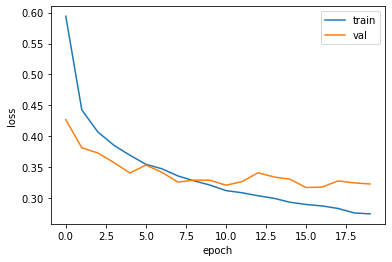

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.   
> 기본적으로 훈련세트의 손시이 검증세트보다 적게 나오는 epochs의 갯수를 선택한다.  

---
## 모델의 저장과 복원
- hdf5 format으로 저장

In [26]:
# model 저장
model.save("../Data/model-whole.h5")

In [27]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [28]:
# 사용
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8876


[0.32261621952056885, 0.887583315372467]

---
# Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해 준다. <- 굉장히 편함

In [29]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/model-whole.h5") # 저장했다가 비교해야하니깐
model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb]
        )

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5880 - accuracy: 0.7924 - val_loss: 0.4305 - val_accuracy: 0.8440
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4383 - accuracy: 0.8419 - val_loss: 0.3837 - val_accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4038 - accuracy: 0.8539 - val_loss: 0.3733 - val_accuracy: 0.8631
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3822 - accuracy: 0.8608 - val_loss: 0.3466 - val_accuracy: 0.8741
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3670 - accuracy: 0.8656 - val_loss: 0.3525 - val_accuracy: 0.8706
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3517 - accuracy: 0.8715 - val_loss: 0.3392 - val_accuracy: 0.8769
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8750 - val_loss: 0.3463 - val_accuracy:

In [30]:
model = keras.models.load_model("../Data/model-whole.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8861


[0.3173748254776001, 0.8860833048820496]

---
# Early_Stopping(조기종료)
- Callback처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.

In [32]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/model-whole.h5") # 저장했다가 비교해야하니깐
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) #patience=2 : 올라가는것을 2번까지 참는다 이상이면 멈출거야

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                    )

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5839 - accuracy: 0.7949 - val_loss: 0.4232 - val_accuracy: 0.8479
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.8418 - val_loss: 0.3824 - val_accuracy: 0.8621
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4028 - accuracy: 0.8531 - val_loss: 0.3878 - val_accuracy: 0.8591
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3791 - accuracy: 0.8629 - val_loss: 0.3531 - val_accuracy: 0.8734
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8663 - val_loss: 0.3404 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8703 - val_loss: 0.3655 - val_accuracy: 0.8668
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3436 - accuracy: 0.8754 - val_loss: 0.3354 - val_accuracy:

In [33]:
# 몇번째 epochs에서 stop 되었는가 ?
early_stopping_cb.stopped_epoch

17

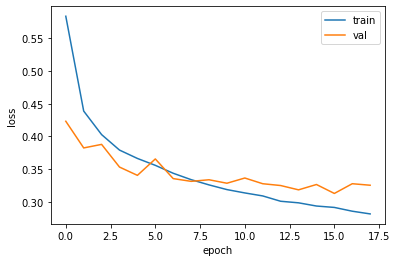

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()